In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [4]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [5]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [6]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428
...,...,...,...,...
2016-12-23,0.001976,0.002295,-0.002097,-0.007531
2016-12-27,0.006331,0.004901,0.002576,0.014113
2016-12-28,-0.004273,-0.008511,-0.005700,0.000946


In [7]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.15599272049632007


Expected Volatility
0.18502649565909488


Sharpe Ratio
0.8430831483926033


In [10]:
# Set seed (optional)
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)

    #Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum(log_ret.mean() * weights) *252

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [12]:
sharpe_arr.max()

1.0303260551271067

In [13]:
sharpe_arr.argmax()

1420

In [17]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [18]:
max_vol_arr = vol_arr[1420]
max_ret_arr = ret_arr[1420]

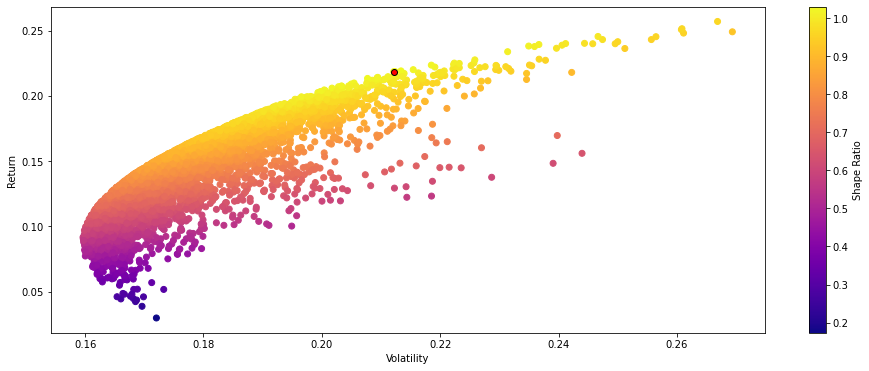

In [19]:
plt.figure(figsize=(16,6))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Shape Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_vol_arr,max_ret_arr,color='red',edgecolor='black')

In [21]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) *252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [22]:
from scipy.optimize import minimize

In [23]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]* -1

In [24]:
def check_sum(weights):
    return np.sum(weights) - 1

In [25]:
cons = ({'type':'eq','fun':check_sum})

In [26]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [27]:
initial_guess = [0.25,0.25,0.25,0.25]

In [29]:
opt_results = minimize(neg_sharpe,initial_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [30]:
opt_results

     fun: -1.0307168703360547
     jac: array([ 5.64157963e-05,  4.18275595e-05,  3.39921698e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.52952041])

In [31]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [32]:
frontier_y = np.linspace(0,0.3,100)

In [38]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [40]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_vol,initial_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_vol.append(result['fun'])

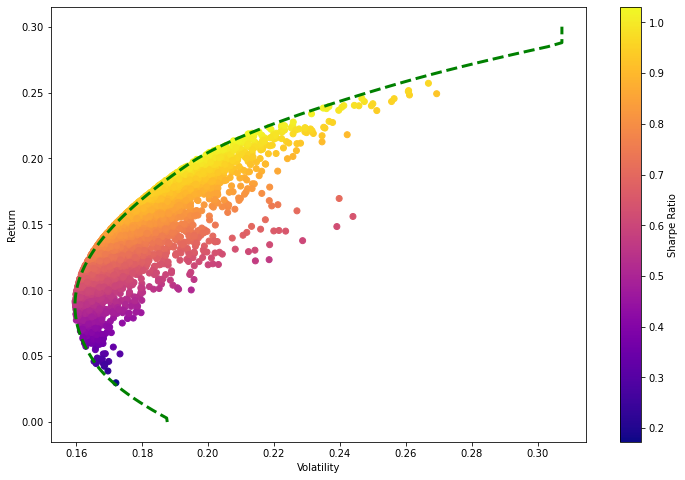

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_vol,frontier_y,'g--',linewidth=3)